<img src="../img/htw-logo.png" width=150>


**I758 Wissens- und KI-basierte Systeme**

# Explorative Datenanalyse: Verteilungen und Zusammenhänge
(c) Ricardo Knauer, Raphael Wallsberger, Christina Kratsch

<font color="green"><b>KLAUSURTAUGLICH.</b></font>
Dieses Notebook gehört zu den fünf Notebooks, die Sie für die Klausur einreichen können. Bei vollständiger und korrekter Bearbeitung **erhalten Sie Punkte für die Abgabe, die zu Ihrer Klausur addiert werden.**


Willkommen bei der ersten praktischen Übung zum Thema explorative Datenanalyse! Wir haben uns während der Vorlesung bereits mit einigen Verfahren beschäftigt, mit denen man einen Datensatz erkunden kann. Im Folgenden wollen wir diese Verfahren auch praktisch anwenden. Zum Glück ist die explorative Analyse von Daten so weit verbreitet, dass es bereits eine Vielzahl an Bibliotheken für genau diesen Zweck gibt. Wir werden für unsere Analyse eine der bekanntesten Bibliotheken verwenden, um interaktive Diagramme zu erstellen: Plotly. Plotly verfügt über Schnittstellen zu einer ganzen Reihe an Programmiersprachen, darunter auch [Python](https://plotly.com/python/). Mit der ersten praktischen Übung verfolgen wir folgende Lernziele:

- Sie sollen lernen, wie Sie Daten mithilfe von Säulen- oder Balkendiagrammen, Histogrammen, Streudiagrammen und Heatmaps in Plotly visualisieren können.
- Sie sollen den Wert von Funktionsargumenten zur Visualisierung sach- und zweckorientiert anpassen können.
- Sie sollen lernen, wie man eigene Hypothesen über einen Datensatz aufstellen und diese im Rahmen einer explorativen Analyse testen kann.

Voraussichtlich werden Sie für diese Übung maximal 2h benötigen.

## Der Datensatz

Für die explorative Analyse von Daten braucht man als Ausgangspunkt erst einmal eins: Daten. Für unsere praktischen Übungen werden wir einen Datensatz verwenden, der uns freundlicherweise von [Prof. Dr. Stephan Matzka](https://www.htw-berlin.de/hochschule/personen/person/?eid=11248) zur Verfügung gestellt wurde. Der Datensatz befasst sich mit einer Fertigungszelle, in der drei Maschinen Produkte herstellen. Werfen Sie einen kurzen Blick auf die [Dokumentation](../data_sets/mechatronic_systems/docs.pdf), um einen Überblick über die verschienden Merkmale in diesem Datensatz zu erhalten. Unser Datensatz ```data.csv``` liegt im sogenannten csv-Format vor (englisch für _comma-separated values_). Das ist ein gängiges Format zum Speichern strukturierter Daten, bei dem einzelne Werte durch Kommas oder andere Trennzeichen separiert sind. Wenn wir uns die Datei [data.csv](../data_sets/mechatronic_systems/data.csv) anschauen, erkennen wir, dass die Trennzeichen in unserem Fall Semikolons sind und dass Floats ein Komma anstelle eines Punktes als Dezimaltrennzeichen aufweisen. Um den Datensatz einzulesen, nutzen wir die [pandas](https://pandas.pydata.org/)-Bibliothek - die erste Wahl bei der Arbeit mit tabellarischen Daten in Python. Eine kleine Anmerkung: Unter diesem Textabschnitt finden Sie einen Codeblock. Codeblöcke wie diesen können Sie ausführen, indem Sie auf den Block klicken und danach gleichzeitig SHIFT und ENTER auf der Tastatur drücken. Die entsprechende Ausgabe erscheint gegebenenfalls unter dem Block. Codeblöcke, die Sie zwischen den Texten in dieser Übung sehen, sollten Sie in der vorgegebenen Reihenfolge ausführen. Bei leeren Codeblöcken müssen Sie zuvor noch Ihren eigenen Code ergänzen.

In [1]:
import pandas as pd

df = pd.read_csv("data/machine_data.csv", delimiter=";", decimal=",")

Sie sehen, dass wir zuerst die pandas-Bibliothek importieren. Um bei Funktionsaufrufen aus dieser Bibliothek nicht jedes Mal ```pandas``` ausschreiben zu müssen, lassen wir Python wissen, dass wir das Kürzel ```pd``` anstelle von ```pandas``` benutzen möchten. Unseren csv-Datensatz können wir einlesen, indem wir einfach den Befehl ```pd.read_csv()``` ausführen. Dabei müssen wir der Funktion natürlich mitteilen, wo sich unsere Daten befinden und dass wir ```;``` als Trennzeichen sowie ```,``` als Dezimaltrennzeichen verwenden möchten. Der Datensatz wird abschließend in der Variable ```df``` in Form einer Tabelle gespeichert. Schauen wir uns die ersten paar Zeilen dieser Tabelle an. Dazu benutzen wir pandas' ```head()```-Funktion:

In [2]:
df.head(10)

,Maschine,Mode,Produkt,Strom / A,Drehmoment / Nm,Drehzahl / 1/min,Temp Umgebung / degC,Temp Umrichter / degC,Temp Werkzeug / degC,Bearbeitungszeit / s
0,A,2.0,Y,22.782,51.79,1461,18.7,23.1,98.7,23.8
1,A,1.0,Y,19.793,45.03,1460,21.0,21.5,87.5,25.3
2,C,3.0,X,25.581,52.00,1463,19.9,21.8,98.1,19.9
3,C,3.0,Y,28.145,57.30,1461,20.7,25.4,109.7,22.3
4,C,2.0,Y,25.544,51.84,1466,19.0,24.1,100.8,23.8
5,A,2.0,X,21.426,48.64,1463,21.5,23.3,95.1,21.4
6,B,2.0,Y,22.786,50.92,1462,20.9,22.8,98.2,24.8
7,C,2.0,X,23.021,46.85,1462,21.3,23.8,93.1,21.4
8,B,2.0,Y,22.255,49.69,1463,21.5,24.4,97.7,24.8
9,C,3.0,X,26.195,53.29,1462,21.9,25.3,104.1,19.9


Die ersten drei Merkmale scheinen in Kategorien eingeteilt zu sein, bei den anderen Merkmalen handelt es sich anscheinend um Floats oder Integers. Wenn wir uns noch einmal die [Dokumentation](../data_sets/mechatronic_systems/docs.pdf) vor Augen halten, so sind ```Maschine``` und ```Produkt``` offensichtlich nominale Merkmale; ```Mode``` ist hingegen ein ordinales Merkmal, da Energiesparbetrieb (```1.0```), Normalbetrieb (```2.0```) und Hochleistungsbetrieb (```3.0```) eine Rangordnung aufweisen. pandas verfügt natürlich nicht über diese Information aus der Dokumentation, daher müssen wir den ersten drei Merkmalen noch den passenden Datentyp zuweisen. Hierzu nutzen wir pandas' ```Categorical()```-Funktion:

In [3]:
df["Maschine"] = pd.Categorical(df["Maschine"])
df["Produkt"] = pd.Categorical(df["Produkt"])
df["Mode"] = pd.Categorical(df["Mode"], ordered=True)

Wie man in dem oberen Codeblock erkennen kann, kann man auf Spalten der Tabelle zugreifen, indem man den Namen der Spalte (als String) zwischen zwei eckige Klammern schreibt. Um pandas mitzuteilen, ob es sich bei einem Merkmal um ein nominales oder um ein ordinales Merkmal handelt, benutzt man in der ```Categorical()```-Funktion das Argument ```ordered```. Das Argument ist standardmäßig auf ```False``` gesetzt. Bei ordinalen Merkmalen muss man der Funktion daher explizit den Wert ```True``` mitgeben. Nachdem wir unseren Merkmalen in der Tabelle also nun die richtigen Datentypen zugewiesen haben, können wir uns endlich den Visualisierungen zuwenden.

<h5>Ein Merkmal, ein Diagramm, viele Kenngrößen</h5>

Sie haben in der Vorlesung bereits erfahren, dass es bei der explorativen Analyse zuerst meist sinnvoll ist, sich anzuschauen, wie oft die verschiedenen Werte in jedem Merkmal vorkommen. Bei nominalen und ordinalen Merkmalen bieten sich Säulen- oder Balkendiagramme zur Visualisierung an, bei metrischen Merkmalen Histogramme. Um interaktive Diagramme zu erstellen, können wir pandas ganz einfach mit Plotly kombinieren. Dazu setzen wir das sogenannte Backend zur Darstellung von Diagrammen auf ```"plotly"```:

In [4]:
pd.options.plotting.backend = "plotly"

Ein [Säulendiagramm](https://plotly.github.io/plotly.py-docs/generated/plotly.express.bar.html) können wir darstellen, indem wir die Anzahl der Werte pro Kategorie mit der ```value_counts()```-Funktion zählen und danach ```plot(kind="bar")``` aufrufen. Für das nominale Merkmal ```Maschine``` sähe das wie folgt aus:

In [5]:
df["Maschine"].value_counts().plot(kind="bar")

Das entsprechende [Balkendiagramm](https://plotly.github.io/plotly.py-docs/generated/plotly.express.bar.html) sähe so aus:

In [6]:
df["Maschine"].value_counts().plot(kind="bar", orientation="h")

Stellen Sie selbstständig ein Säulen- oder Balkendiagramm für das nominale Merkmal ```Produkt``` dar. Was fällt Ihnen auf?

In [7]:
import pandas as pd
df = pd.read_csv("data/machine_data.csv", delimiter=";", decimal=",")
df["Produkt"] = pd.Categorical(df["Produkt"])
df["Produkt"].value_counts().plot(kind="barh")

Widmen wir uns als nächstes den metrischen Merkmalen. Metrische Merkmale kann man in Wertebereiche (englisch _bins_) einteilen und in einem [Histogramm](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) visualisieren. Ein Histogramm stellt eine Häufigkeitsverteilung dar, die man mit einigen Eigenschaften charakterisieren kann. Eventuell möchten Sie auf Wikipedia kurz nachschauen, was ein Mittelwert, eine Standardabweichung, ein Median sowie Quantile sind.

Ein Histogramm lässt sich mit Plotly ganz einfach darstellen, zum Beispiel für die Drehzahl pro Minute:

In [8]:
df["Drehzahl / 1/min"].plot(kind="hist")

Versuchen Sie, mit der Histogramm-Funktion zu spielen: stellen Sie selbständig ein Histogramm von der Stromaufnahme in Ampere dar. Was fällt Ihnen an dieser Verteilung auf?

In [9]:
import pandas as pd

df = pd.read_csv("data/machine_data.csv", delimiter=";", decimal=",")
df["Strom / A"].plot(kind="hist")

Vielleicht ist Ihnen aufgefallen, dass sich die Anzahl der Wertebereiche zwischen den beiden Histogrammen unterscheidet. Im Histogramm zur Drehzahl pro Minute gibt es 12 solcher Bereiche, im Histogramm zur Stromaufname in Ampere 24. In Plotly gibt es einen Algorithmus, der die optimale Anzahl und Breite der Wertebereiche automatisch festlegt. Man kann allerdings über das ```nbins```-Argument zumindest die maximale Anzahl der Wertebereiche bestimmen. Setzen Sie das ```nbins```-Argument auf ```100``` und beobachten Sie, wie sich das Histogramm verändert. Fällt Ihnen bei der Häufigkeitsverteilung etwas auf, das Ihnen bei einer kleineren Anzahl von Wertebereichen vielleicht nicht aufgefallen wäre (Stichwort: Ausreißer)? Lohnt sich das Testen einer größeren Anzahl von Wertebereichen oder genügt die Standardeinstellung?

In [10]:
import pandas as pd

df = pd.read_csv("data/machine_data.csv", delimiter=";", decimal=",")
df["Strom / A"].plot(kind="hist", bins=100)

Zuletzt wollen wir uns noch anschauen, wie wir relative anstatt absolute Häufigkeiten angeben können. Nutzen Sie hierfür das ```histnorm```-Argument und setzen es auf ```"probability"```:

In [11]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("data/machine_data.csv", delimiter=";", decimal=",")
fig = px.histogram(df, x="Strom / A", histnorm="probability")

Natürlich ergibt es noch Sinn, die anderen Merkmale zu visualisieren. Da Ihnen die Funktionsaufrufe hierfür aber nun bekannt sein sollten, möchten wir an dieser Stelle darauf verzichten. Stattdessen wollen wir unsere Häufigkeitsverteilungen in einigen Kenngrößen zusammenzufassen. Dafür nutzen wir pandas' ```describe()```-Funktion und setzen ```include``` auf ```"all"```:

In [12]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("data/machine_data.csv", delimiter=";", decimal=",")
df.describe(include="all")

,Maschine,Mode,Produkt,Strom / A,Drehmoment / Nm,Drehzahl / 1/min,Temp Umgebung / degC,Temp Umrichter / degC,Temp Werkzeug / degC,Bearbeitungszeit / s
count,1000,999.000000,1000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,3,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,416,NaN,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.916917,NaN,22.501915,48.555380,1460.945000,20.984700,23.750500,95.196400,23.008900
std,NaN,0.689242,NaN,2.520593,3.692908,1.916154,1.374695,1.040876,5.688506,1.970897
min,NaN,1.000000,NaN,18.221000,41.430000,1456.000000,17.300000,20.300000,82.900000,19.900000
25%,NaN,1.000000,NaN,20.435500,45.527500,1460.000000,20.100000,23.075000,90.600000,21.400000
50%,NaN,2.000000,NaN,22.102000,47.515000,1461.000000,21.000000,23.700000,94.000000,22.400000
75%,NaN,2.000000,NaN,24.668000,51.602500,1462.000000,21.900000,24.400000,99.800000,25.300000


Durch diesen Funktionsaufruf werden eine ganze Menge Kenngrößen ausgegeben. Unter ```count``` wird die Anzahl von nicht-fehlenden Werten angegeben (also von Werten, die nicht "not a number" bzw. ```NaN``` sind), unter ```unique``` wird die Anzahl der Kategorien bei nominalen und ordinalen Daten angegeben, unter ```top``` der Modus und unter ```freq``` die Häufigkeit des Modus. Während uns ```count``` einen Aufschluss über die Datenqualität gibt, liefern uns ```unique```, ```top``` und ```freq``` eigentlich keine zusätzliche Information im Vergleich zu unserer interaktiven Visualisierung. Interessanter ist die Angabe des arithmetischen Mittels ```mean```, der Standardabweichung ```std```, des Minimums ```min```, des unteren Quartils ```25%```, des mittleres Quartils bzw. Medians ```50%```, des oberen Quartils ```75%``` sowie des Maximums ```max```. Weitere Streuungsmaße wie die Varianz, die Spannweite oder der Interquartilsabstand können bei Bedarf aus diesen Kenngrößen einfach berechnet werden. Sie erinnern sich, dass jedes dieser Lage- und Streuungsmaße bestimmte Vor- und Nachteile aufweist. Eine allgemeine Empfehlung, welches Maß zu bevorzugen ist, kann man daher nicht abgeben.

Wählen Sie nun ein metrisches Merkmal aus, bei dem es einen Unterschied ≥ 1 zwischen dem arithmetischen Mittel und dem Median gibt. Überlegen Sie sich, was Gründe für den Unterschied sein könnten. Überprüfen Sie Ihre Vermutungen dann durch eine passende Visualisierung!

In [13]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("data/machine_data.csv", delimiter=";", decimal=",")

metrisches_merkmal = "Strom / A"

mean_value = df[metrisches_merkmal].mean()
median_value = df[metrisches_merkmal].median()

fig = px.histogram(df, x=metrisches_merkmal, histnorm="probability", title=f'Histogramm von {metrisches_merkmal}')
fig.update_layout(
    annotations=[
        dict(
            x=mean_value,
            y=0.1,
            xref="x",
            yref="y",
            text=f'Mean: {mean_value:.2f}',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x=median_value,
            y=0.1,
            xref="x",
            yref="y",
            text=f'Median: {median_value}',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)

fig.show()

## Korrelationen untersuchen

Wir hoffen, dass wir Sie bereits von den Fähigkeiten von pandas und Plotly für die explorative Datenanalyse überzeugen konnten. Sie haben gesehen, dass es für die Darstellung eines Säulen- oder Balkendiagramms oder eines Histogramms jeweils nur einer einzigen Zeile Code bedarf; auch Lage- und Streuungsmaße können mit nur einer einzigen Zeile Code ausgegeben werden (bzw. drei Zeilen Code, wenn man auch unsere Implementierung für ordinale Merkmale verwenden möchte). Richtig interessant wird es oft aber erst, wenn wir nach weiteren Mustern und Zusammenhängen in den Daten suchen. Dazu müssen wir uns mehr als nur ein Merkmal zur gleichen Zeit anschauen. Wir gehen im Folgenden davon aus, dass wir nach unserer explorativen Analyse noch eine gezielte Analyse zu interessanten Muster und Zusammenhängen planen. Um Aussagen über unsere Stichprobe hinaus treffen zu können, müssen wir unsere Erkenntnisse später auf einem unabhängigen Datensatz testen können und daher an dieser Stelle unsere Daten in einen Explorations- und einen Testdatensatz aufteilen. Wir nutzen dazu eine einfache Randomisierung. Wir wählen also mit der ```sample()```-Funktion einen bestimmten Bruchteil unserer Daten zufällig zum Explorieren aus, zum Beispiel 75% bzw. ```0.75```. Um eine reproduzierbare Aufteilung zu erhalten, fixieren wir zudem den [Startwert des Zufallszahlengenerators](https://de.wikipedia.org/wiki/Seed_key), zum Beispiel auf ```42```:

In [14]:
import pandas as pd

df = pd.read_csv("data/machine_data.csv", delimiter=";", decimal=",")
df["Maschine"] = pd.Categorical(df["Maschine"])
df["Produkt"] = pd.Categorical(df["Produkt"])
df["Mode"] = pd.Categorical(df["Mode"], ordered=True)

exploration_data = df.sample(frac=0.75, random_state=42)
exploration_data

,Maschine,Mode,Produkt,Strom / A,Drehmoment / Nm,Drehzahl / 1/min,Temp Umgebung / degC,Temp Umrichter / degC,Temp Werkzeug / degC,Bearbeitungszeit / s
521,A,1.0,Y,19.328,43.92,1461,22.6,23.5,88.6,25.3
737,C,1.0,Y,21.265,43.37,1459,19.8,23.0,86.7,25.3
740,A,1.0,Y,20.198,45.96,1459,19.2,23.2,90.9,25.3
660,C,3.0,X,25.700,52.28,1462,22.8,25.5,102.4,19.9
411,C,1.0,Y,21.949,44.61,1464,18.9,22.5,87.9,25.3
...,...,...,...,...,...,...,...,...,...,...
641,A,2.0,Y,22.299,50.61,1463,19.8,22.6,97.6,23.8
915,C,2.0,X,22.801,46.49,1459,20.6,23.2,91.9,21.4
752,C,3.0,X,26.118,53.16,1462,20.4,22.7,101.1,19.9
806,A,1.0,Y,20.283,46.11,1461,19.3,23.3,91.0,25.3


### Zusammenhang von Merkmalen

Nachdem wir nun einen Explorationsdatensatz erstellt haben, können wir uns den Zusammenhang von Merkmalen für diesen Datensatz anschauen. Hierzu erstellen wir ein [Streudiagramm](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter.html), zum Beispiel für die Stromaufnahme in Ampere und das Drehmoment in Newtonmeter:

In [15]:
exploration_data.plot(kind="scatter", x="Strom / A", y="Drehmoment / Nm")

Für die Maschinen müssen wir den Code etwas umständlicher formulieren, da sich die Plot-Funktion mit kategorischen Variablen etwas schwer tun kann...

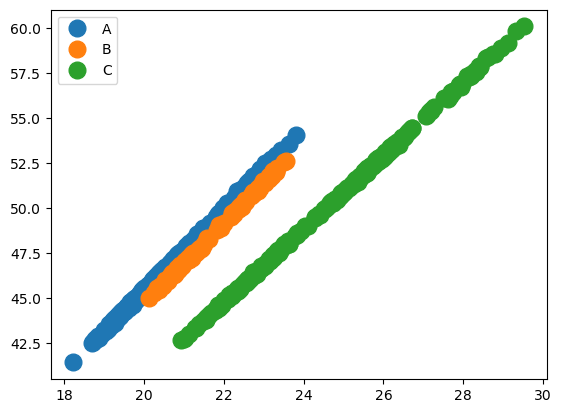

In [16]:
import matplotlib.pyplot as plt
groups = exploration_data.groupby('Maschine')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Strom / A'], group['Drehmoment / Nm'], marker='o', linestyle='', ms=12, label=name)
_ = ax.legend()

Die beiden Streudiagramme zeigen, dass sich die drei geraden Linien durch die verschiedenen Maschinen ergeben. Testen Sie als nächstes den Zusammenhang zwischen der Stromaufnahme in Ampere und der Werkzeug-Temperatur in °Celsius. Was können Sie erkennen?

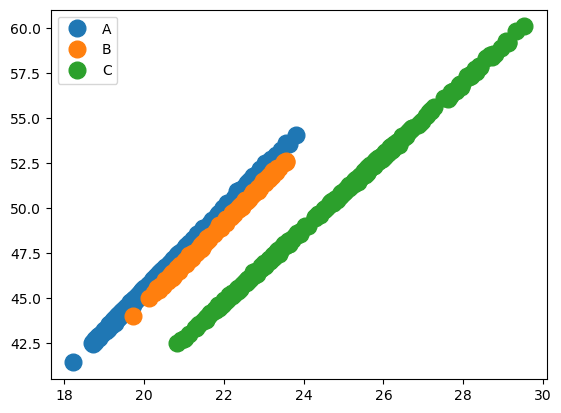

In [18]:
import matplotlib.pyplot as plt

exploration_data =  pd.read_csv("data/machine_data.csv",delimiter=";", decimal=",")
groups = exploration_data.groupby('Maschine')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Strom / A'], group['Drehmoment / Nm'], marker='o', linestyle='', ms=12, label=name)
_ = ax.legend()

plt.show()



Um Ihnen eine bessere Intuition über die Größe und Richtung eines Zusammenhangs zu geben, haben wir eine Auswahl an Streudiagrammen mit unterschiedlichen Zusammenhängen zusammengestellt. Versuchen Sie, die unten aufgeführten Zusammenhänge einzuschätzen. Ist der folgende Zusammenhang groß oder klein, positiv oder negativ?

<img src="./img/corr_10.svg" height=200>

Wie sieht es bei dem nächsten Zusammenhang aus?

<img src="./img/corr_-10.svg" height=200>

Überlegen Sie, wie ein Streudiagramm aussehen würde, wenn es keinen Zusammenhang zwischen den Merkmalen gäbe. Beschreiben Sie dann den folgenden Zusammenhang:

<img src="./img/corr_00.svg" height=200>

Schätzen Sie zum Schluss noch diesen Zusammenhang ein:

<img src="./img/corr_08.svg" height=200>

Möchten Sie Ihre Intuition über die Größe von Zusammenhängen (mit dem Korrelationskoeffizienten nach Pearson) noch weiter ausbauen, empfehlen wir Ihnen das Online-Spiel [Guess the Correlation](http://guessthecorrelation.com/). 

## Korrelationen und Transformationen

Mit dem besseren Verständnis über die Stärke und Richtung von Zusammenhängen können wir uns nun direkt die Korrelationskoeffizienten nach Pearson für unsere metrischen Merkmale anschauen. Dazu benutzen wir die ```corr()```-Funktion (zur Bestimmung der Korrelationen) in Verbindung mit ```"plt.imshow"``` (kurz für _image show_) und passenden Farben (```"RdBu_r"```) zur Erstellung einer [Heatmap](https://plotly.github.io/plotly.py-docs/generated/plotly.express.imshow.html). Versuchen Sie, sich anhand der Farben und Ihrem Wissen über den Pearsons Correlation einen Reim aus der Matrix zu machen:

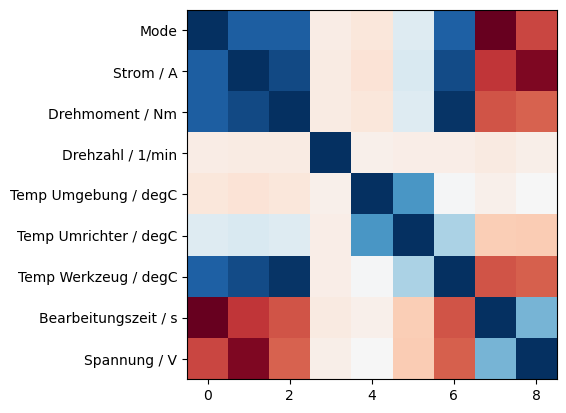

In [25]:
import numpy as np

numeric_cols = exploration_data.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
plt.imshow(corr, cmap="RdBu")
_ = plt.yticks(range(len(corr)), corr.index)

Die Matrix ist etwas schwer zu lesen und es ist mühsam, die Label ordentlich an die Achsen zu schreiben. Dankenswerterweise gibt es unzählige Möglichkeiten, mit ```pandas``` und den zugehörigen Visualisierungsbibliotheken wie z.B. ```plotly```, ```matplotlib``` und ```seaborn``` ansprechende Visualisierungen zu gestalten. Die Kunst liegt vor allem darin, die Bibliotheken auseinander zu halten und die richtige auszuwählen, z.B. um eine geclusterte Heatmap zu erzeugen:

In [26]:
corr.style.background_gradient(cmap ='coolwarm')

,Mode,Strom / A,Drehmoment / Nm,Drehzahl / 1/min,Temp Umgebung / degC,Temp Umrichter / degC,Temp Werkzeug / degC,Bearbeitungszeit / s,Spannung / V
Mode,1.000000,0.835772,0.839966,0.006522,-0.035425,0.193015,0.831052,-0.856040,-0.547725
Strom / A,0.835772,1.000000,0.912103,-0.001132,-0.054343,0.210063,0.902496,-0.591317,-0.792864
Drehmoment / Nm,0.839966,0.912103,1.000000,-0.006293,-0.030835,0.194336,0.982286,-0.513077,-0.475290
Drehzahl / 1/min,0.006522,-0.001132,-0.006293,1.000000,0.022899,0.008019,0.009744,-0.012222,0.018289
Temp Umgebung / degC,-0.035425,-0.054343,-0.030835,0.022899,1.000000,0.613823,0.084915,0.021571,0.074822
Temp Umrichter / degC,0.193015,0.210063,0.194336,0.008019,0.613823,1.000000,0.367212,-0.153698,-0.160730
Temp Werkzeug / degC,0.831052,0.902496,0.982286,0.009744,0.084915,0.367212,1.000000,-0.514064,-0.480132
Bearbeitungszeit / s,-0.856040,-0.591317,-0.513077,-0.012222,0.021571,-0.153698,-0.514064,1.000000,0.503361
Spannung / V,-0.547725,-0.792864,-0.475290,0.018289,0.074822,-0.160730,-0.480132,0.503361,1.000000


Deckt sich die berechnete Korrelation mit Ihren Erkenntnissen aus den Streudiagrammen? Fallen Ihnen noch weitere interessante Zusammenhänge auf? Manchmal ergeben sich interessante Zusammenhänge erst, wenn man verschiedene Merkmale miteinander kombiniert. So können wir zum Beispiel die Spannung aus der Drehzahl, dem Drehmoment und der Stromstärke [berechnen](https://en.wikipedia.org/wiki/Electric_motor). Lassen Sie uns hierzu eine neue Spalte in unserer Tabelle anlegen:

In [31]:
exploration_data["Spannung / V"] = (2 * 3.14 / 60 * exploration_data["Drehzahl / 1/min"] *
exploration_data["Drehmoment / Nm"] / exploration_data["Strom / A"])

Nun können wir die Korrelationskoeffizienten nach Pearson für unser neues Merkmal noch einmal darstellen:

In [34]:
import numpy as np

numeric_cols = exploration_data.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
corr.style.background_gradient(cmap ='coolwarm')

,Mode,Strom / A,Drehmoment / Nm,Drehzahl / 1/min,Temp Umgebung / degC,Temp Umrichter / degC,Temp Werkzeug / degC,Bearbeitungszeit / s,Spannung / V
Mode,1.000000,0.835772,0.839966,0.006522,-0.035425,0.193015,0.831052,-0.856040,-0.547725
Strom / A,0.835772,1.000000,0.912103,-0.001132,-0.054343,0.210063,0.902496,-0.591317,-0.792864
Drehmoment / Nm,0.839966,0.912103,1.000000,-0.006293,-0.030835,0.194336,0.982286,-0.513077,-0.475290
Drehzahl / 1/min,0.006522,-0.001132,-0.006293,1.000000,0.022899,0.008019,0.009744,-0.012222,0.018289
Temp Umgebung / degC,-0.035425,-0.054343,-0.030835,0.022899,1.000000,0.613823,0.084915,0.021571,0.074822
Temp Umrichter / degC,0.193015,0.210063,0.194336,0.008019,0.613823,1.000000,0.367212,-0.153698,-0.160730
Temp Werkzeug / degC,0.831052,0.902496,0.982286,0.009744,0.084915,0.367212,1.000000,-0.514064,-0.480132
Bearbeitungszeit / s,-0.856040,-0.591317,-0.513077,-0.012222,0.021571,-0.153698,-0.514064,1.000000,0.503361
Spannung / V,-0.547725,-0.792864,-0.475290,0.018289,0.074822,-0.160730,-0.480132,0.503361,1.000000


Ergeben sich durch unser neues Merkmal neue interessante Zusammenhänge? Versuchen Sie nun selbst, eine Hypothese darüber aufzustellen, welche Merkmalskombination interessante Zusammenhänge zeigen könnte. Ohne Wissen über mechatronische Systeme erwarten wir natürlich nicht, dass Ihre Hypothese plausibel ist. Für unsere Zwecke würde daher auch die Hypothese genügen, dass sich durch die Multiplikation oder Division zweier beliebiger Merkmale möglicherweise ein neues interessantes Merkmal ergeben könnte. Legen Sie in der Tabelle dann eine neue Spalte für Ihr Merkmal an und lassen Sie sich die Korrelationskoeffizienten nach Pearson in einer Heatmap ausgeben. Nicht-benötige Spalten können Sie bei Bedarf mit ```del exploration_data["..."]``` löschen, indem sie ```...``` durch den Spaltennamen ersetzen. Achtung - solche Befehle können Sie offensichtlich nicht wiederholt ausfüllen.

In [36]:
# del exploration_data["Spannung / V"]

**Prima!**
Sie haben mit dieser Übung einiges erreicht. Sie können nun sowohl Säulen- oder Balkendiagramme, Histogramme, Streudiagramme als auch Heatmaps in Plotly visualisieren, um einen Datensatz zu erkunden - alles in jeweils nur einer einzigen Zeile Code. Sie haben zudem die wichtigsten Funktionsargumente kennengelernt und haben einige davon auch selbst angepasst. Dass Sie auch eigene Hypothesen aufstellen und testen können, eröffnet Ihnen die Möglichkeit, Ihre eigenen Annahmen auch ohne eine gezielte Datenanalyse auf die Probe zu stellen. 